<a href="https://colab.research.google.com/github/Kishan-Ved/Data-Narratives/blob/main/Tennis_Major_Datasets_Data_Narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
aus_men = pd.read_csv("C:\\Users\\manis\\Downloads\\AusOpen-men-2013.csv")
aus_men["Tournament"] = ["Australian Open 2013"]*len(aus_men)

In [ ]:
aus_women = pd.read_csv("C:\\Users\\manis\\Downloads\\AusOpen-women-2013.csv")
aus_women["Tournament"] = ["Australian Open 2013"]*len(aus_women)
aus_women.columns = aus_men.columns

In [ ]:
fr_men = pd.read_csv("C:\\Users\\manis\\Downloads\\FrenchOpen-men-2013.csv")
fr_men["Tournament"] = ["French Open 2013"]*len(fr_men)
fr_men.columns = aus_men.columns

In [ ]:
fr_women = pd.read_csv("C:\\Users\\manis\\Downloads\\FrenchOpen-women-2013.csv")
fr_women["Tournament"] = ["French Open 2013"]*len(fr_women)
fr_women.columns = aus_men.columns

In [ ]:
us_men = pd.read_csv("C:\\Users\\manis\\Downloads\\USOpen-men-2013.csv")
us_men["Tournament"] = ["US Open 2013"]*len(us_men)
us_men.columns = aus_men.columns

In [ ]:
us_women = pd.read_csv("C:\\Users\\manis\\Downloads\\USOpen-women-2013.csv")
us_women["Tournament"] = ["US Open 2013"]*len(us_women)
us_women.columns = aus_men.columns

In [ ]:
w_men = pd.read_csv("C:\\Users\\manis\\Downloads\\Wimbledon-men-2013.csv")
w_men["Tournament"] = ["Wimbledon 2013"]*len(w_men)
w_men.columns = aus_men.columns

In [ ]:
w_women = pd.read_csv("C:\\Users\\manis\\Downloads\\Wimbledon-women-2013.csv")
w_women["Tournament"] = ["Wimbledon 2013"]*len(w_women)
w_women.columns = aus_men.columns

In [ ]:
df = pd.concat([aus_men, aus_women, us_men, us_women, fr_men, fr_women, w_men, w_women], ignore_index=True)
df.shape

(943, 43)

In [ ]:
df

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2,Tournament
0,Lukas Lacko,Novak Djokovic,1,0,0.0,3.0,61,35,39,18,...,8.0,8.0,9.0,101.0,6.0,7.0,6.0,NaN,NaN,Australian Open 2013
1,Leonardo Mayer,Albert Montanes,1,1,3.0,0.0,61,31,39,13,...,0.0,NaN,NaN,42.0,1.0,3.0,1.0,NaN,NaN,Australian Open 2013
2,Marcos Baghdatis,Denis Istomin,1,0,0.0,3.0,52,53,48,20,...,13.0,12.0,16.0,126.0,6.0,7.0,6.0,NaN,NaN,Australian Open 2013
3,Dmitry Tursunov,Michael Russell,1,1,3.0,0.0,53,39,47,24,...,7.0,NaN,NaN,79.0,2.0,2.0,3.0,NaN,NaN,Australian Open 2013
4,Juan Monaco,Ernests Gulbis,1,0,1.0,3.0,76,63,24,12,...,5.0,16.0,28.0,127.0,1.0,6.0,7.0,6.0,NaN,Australian Open 2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,A.Radwanska,N.Li,5,1,2.0,1.0,77,52,23,9,...,4.0,71.0,48.0,NaN,6.0,6.0,2.0,NaN,NaN,Wimbledon 2013
939,S.Lisicki,K.Kanepi,5,1,2.0,0.0,59,26,41,10,...,1.0,19.0,9.0,NaN,3.0,3.0,NaN,NaN,NaN,Wimbledon 2013
940,M.Bartoli,K.Flipkens,6,1,2.0,0.0,61,21,39,10,...,1.0,21.0,8.0,NaN,1.0,2.0,NaN,NaN,NaN,Wimbledon 2013
941,S.Lisicki,A.Radwanska,6,1,2.0,1.0,63,53,37,19,...,6.0,31.0,16.0,NaN,4.0,6.0,7.0,NaN,NaN,Wimbledon 2013


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Final Cell

# Probability of a player winning even if the number of unforced errors > 20.

tot = 0
ctr = 0
for i in range(len(df)):
    if df.loc[i,"UFE.1"]!=None and df.loc[i,"UFE.1"]>20:
        tot+=1
        if df.loc[i,"Result"]==1:
            ctr+=1
            
for i in range(len(df)):
    if df.loc[i,"UFE.2"]!=None and df.loc[i,"UFE.2"]>20:
        tot+=1
        if df.loc[i,"Result"]==0:
            ctr+=1

prob = ctr/tot

print("The probability of a player winning a game even if he commits more than 20 unforced errors is :",prob)

The probability of a player winning a game even if he commits more than 20 unforced errors is : 0.42488038277511964


The correlation coefficient between the percentage of net points won and the percentage of break points won is:
0.02582502873065695


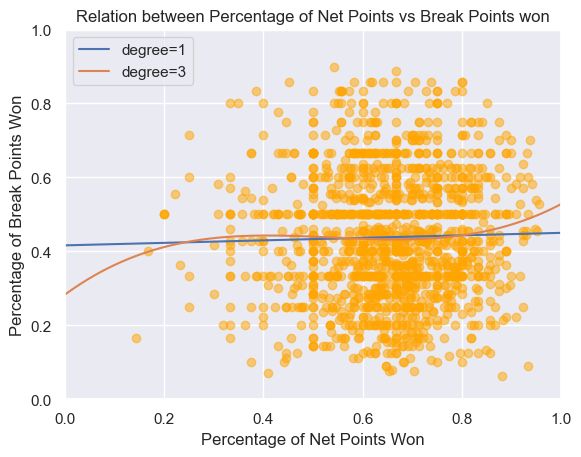

In [ ]:
# Final Cell

# Hypothesis - A player skilled at scoring net points is also good at scoring break points

# Correcting the data
df["NPPt.1"] = df.loc[:,"NPW.1"]/df.loc[:,"NPA.1"]
df["NPPt.1"].fillna(0,inplace=True)
df["NPPt.1"]
df["NPP.1"] = df["NPPt.1"].apply(lambda x: 1/x if x>1 else x)

df["NPPt.2"] = df.loc[:,"NPW.2"]/df.loc[:,"NPA.2"]
df["NPPt.2"].fillna(0,inplace=True)
df["NPPt.2"]
df["NPP.2"] = df["NPPt.2"].apply(lambda x: 1/x if x>1 else x)

df["BPPt.1"] = df.loc[:,"BPW.1"]/df.loc[:,"BPC.1"] 
df["BPPt.1"].fillna(0,inplace=True)
df["BPPt.1"]
df["BPP.1"] = df["BPPt.1"].apply(lambda x: 1/x if x>1 else x)

df["BPPt.2"] = df.loc[:,"BPW.2"]/df.loc[:,"BPC.2"] 
df["BPPt.2"].fillna(0,inplace=True)
df["BPPt.2"]
df["BPP.2"] = df["BPPt.2"].apply(lambda x: 1/x if x>1 else x)

# Removing the zeros
import numpy as np
nppt = np.array(df["NPP.1"].values.tolist() + df["NPP.2"].values.tolist())
bppt = np.array(df["BPP.1"].values.tolist() + df["BPP.2"].values.tolist())

npp1 = nppt[nppt != 0]
bpp1 = bppt[nppt != 0]

npp2 = npp1[bpp1 != 0]
bpp2 = bpp1[bpp1 != 0]

npp3 = npp2[npp2 != 1]
bpp3 = bpp2[npp2 != 1]

npp = npp3[bpp3 != 1]
bpp = bpp3[bpp3 != 1]

# Performing Linear and Polynomial Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
# increases the dimension by making points like x1*x2 etc.

def PolynomialRegression(degree=2, **kwargs): 
# kwargs - keyword arguments, position does not matter, these are passed to LinearRegression() later
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(npp, bpp, color='orange',alpha=0.5)
axis = plt.axis()
for degree in [1,3]:
    y_test = PolynomialRegression(degree).fit(npp[:,np.newaxis], bpp).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(0, 1)
plt.ylim(0,1)
plt.xlabel("Percentage of Net Points Won")
plt.ylabel("Percentage of Break Points Won")
plt.title("Relation between Percentage of Net Points vs Break Points won")
plt.legend(loc='best'); 
print("The correlation coefficient between the percentage of net points won and the percentage of break points won is:")
print(np.corrcoef(npp,bpp)[0,1])

In [ ]:
# Answer -  Not necessarily true

The correlation coefficient between the percentage of net points won and the percentage of break points won is:
0.4213028077888897


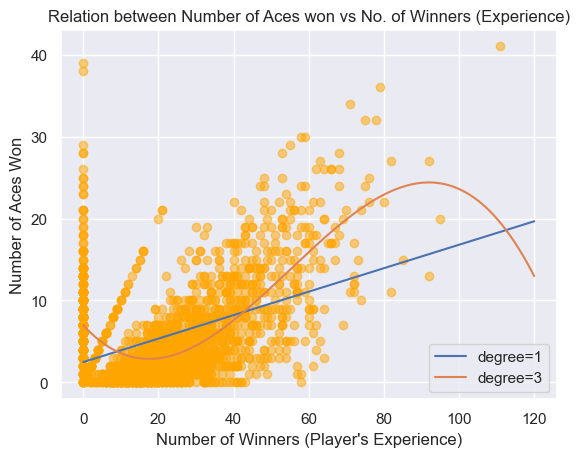

In [ ]:
# Final Cell

# Relation betweeen Number of Aces won and Number of Winners of a player (experience)

df["ACE.1"].fillna(0,inplace=True)
df["ACE.2"].fillna(0,inplace=True)
df["WNR.1"].fillna(0,inplace=True)
df["WNR.2"].fillna(0,inplace=True)

npp = np.array(df["WNR.1"].values.tolist() + df["WNR.2"].values.tolist())
bpp = np.array(df["ACE.1"].values.tolist() + df["ACE.2"].values.tolist())

# Performing Linear and Polynomial Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline # increases the dimension by making points like x1*x2 etc.

def PolynomialRegression(degree=2, **kwargs): # kwargs - keyword arguments, position does not matter, these are passed to LinearRegression() later
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
X_test = np.linspace(0, 120, 5000)[:, None]

plt.scatter(npp, bpp, color='orange',alpha=0.5)
axis = plt.axis()
for degree in [1,3]:
    y_test = PolynomialRegression(degree).fit(npp[:,np.newaxis], bpp).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
# plt.xlim(0, 1)
# plt.ylim(0,1)
plt.xlabel("Number of Winners (Player's Experience)")
plt.ylabel("Number of Aces Won")
plt.title("Relation between Number of Aces won vs No. of Winners (Experience)")
plt.legend(loc='best'); 
print("The correlation coefficient between the percentage of net points won and the percentage of break points won is:")
print(np.corrcoef(npp,bpp)[0,1])

In [ ]:
# Final cell

# Which were the most interesting games of the year 2023?

ndf = pd.DataFrame(columns=df.columns)
for i,row in df.iterrows():
    if not np.isnan(row["ST5.2"]):
        ndf = ndf.append(row)
        # print(row)

ndf

ndf["Total Points"] = ndf.loc[:,"TPW.1"] + ndf.loc[:,"TPW.2"]
ndf = ndf.drop(['Result', 'FNL1', 'FNL2', 'FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1',
       'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2',
       'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2',  'NPPt.1', 'NPP.1', 'NPPt.2',
       'NPP.2', 'BPPt.1', 'BPP.1', 'BPPt.2', 'BPP.2'],axis=1)
ndf =ndf.dropna()
ndf = ndf.sort_values("Total Points",ascending=False)
ndf = ndf.drop([ 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1',
       'ST4.1', 'ST5.1', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2',
        ],axis=1)

print("Most interesting matches of the year 2013:")
ndf.head(5)


Most interesting matches of the year 2013:


,Player1,Player2,Round,Tournament,Total Points
36,Daniel Brands,Gilles Simon,1,Australian Open 2013,461.0
562,Tommy Haas,John Isner,3,French Open 2013,437.0
365,Richard Gasquet,Milos Raonic,1,US Open 2013,402.0
542,Fernando Verdasco,Janko Tipsarevic,2,French Open 2013,381.0
299,Benoit Paire,Alex Bogomolov Jr.,1,US Open 2013,372.0


In [ ]:
# Final Cell

# Was there any player who was out of the Australian Open 2013 tournament in the first round itself and made it into the semi-final round of any successive tennis tournament in 2013.
aus_r1 = set()
aus_r2 = set()
for i in range(len(df)):
    if df.loc[i,"Round"]==1 and df.loc[i,"Tournament"]=="Australian Open 2013":
        aus_r1.add(df.loc[i,"Player1"])
        aus_r1.add(df.loc[i,"Player2"])
    if df.loc[i,"Round"]==2 and df.loc[i,"Tournament"]=="Australian Open 2013":
        aus_r2.add(df.loc[i,"Player1"])
        aus_r2.add(df.loc[i,"Player2"])

us_r6 = set()
for i in range(len(df)):
    if df.loc[i,"Round"]==6 and df.loc[i,"Tournament"]=="US Open 2013":
        us_r6.add(df.loc[i,"Player1"])
        us_r6.add(df.loc[i,"Player2"])


fr_r6 = set()
for i in range(len(df)):
    if df.loc[i,"Round"]==6 and df.loc[i,"Tournament"]=="French Open 2013":
        fr_r6.add(df.loc[i,"Player1"])
        fr_r6.add(df.loc[i,"Player2"])

w_r6 = set()
for i in range(len(df)):
    if df.loc[i,"Round"]==6 and df.loc[i,"Tournament"]=="Wimbledon 2013":
        w_r6.add(df.loc[i,"Player1"])
        w_r6.add(df.loc[i,"Player2"])

s = set()
for name in aus_r1 :
    if name in aus_r2:
        continue
    if name in fr_r6 or name in w_r6 or name in us_r6:
        s.add(name)
# tot = len(df)

print(len(s))
print(s)

1
{'Sara Errani'}


In [ ]:
# Final cell

# What is the probability that the player who loses the first set wins the match?

tot = len(df)
ctr = 0
for i in range(tot):
    if df.loc[i,"ST1.1"]>df.loc[i,"ST1.2"] and df.loc[i,"Result"]==1:
        ctr+=1
    elif df.loc[i,"ST1.1"]<df.loc[i,"ST1.2"] and df.loc[i,"Result"]==0:
        ctr+=1

print("The probability of a player winning the game given he lost the first set is: ")
print(1 - ctr/tot)

The probability of a player winning the game given he lost the first set is: 
0.17709437963944852


In [ ]:
# Final Cell

# Out of all the winners of different tournaments held in 2013, who committed the least errors? (error = 2*double faults + unforced errors)

f = set()
for i in range(len(df)):
    if df.loc[i,"Round"]==7 and df.loc[i,"Tournament"]=="Australian Open 2013":
        f.add(df.loc[i,"Player1"]) if df.loc[i,"Round"]==1 else f.add(df.loc[i,"Player2"])

for i in range(len(df)):
    if df.loc[i,"Round"]==7 and df.loc[i,"Tournament"]=="US Open 2013":
        f.add(df.loc[i,"Player1"]) if df.loc[i,"Round"]==1 else f.add(df.loc[i,"Player2"])

for i in range(len(df)):
    if df.loc[i,"Round"]==7 and df.loc[i,"Tournament"]=="French Open 2013":
        f.add(df.loc[i,"Player1"]) if df.loc[i,"Round"]==1 else f.add(df.loc[i,"Player2"])

for i in range(len(df)):
    if df.loc[i,"Round"]==7 and df.loc[i,"Tournament"]=="Wimbledon 2013":
        f.add(df.loc[i,"Player1"]) if df.loc[i,"Round"]==1 else f.add(df.loc[i,"Player2"])

dict = {name:0 for name in f}
for i in range(len(df)):
    for name in f:
        if df.loc[i,"Player1"] == name:
            dict[name]+=(df.loc[i,"UFE.1"]+2*df.loc[i,"DBF.1"])
        elif df.loc[i,"Player2"] == name:
            dict[name]+=(df.loc[i,"UFE.2"]+2*df.loc[i,"DBF.2"])
dict

{'V Azarenka': 240.0,
 'Maria Sharapova': 506.0,
 'A.Murray': 149.0,
 'Stanislas Wawrinka': nan,
 'David Ferrer': nan,
 'M.Bartoli': 169.0,
 'Dominika Cibulkova': 268.0}

In [ ]:
# Final Cell

# What is the probability that a player commits more errors (2*double faults and unforced errors) thatn the opponent, but still wins the game?
for i in range(len(df)):
    df['TE.1'] = 2*df.loc[i, "DBF.1"] + df.loc[i,"UFE.1"]
    df['TE.2'] = 2*df.loc[i, "DBF.2"] + df.loc[i,"UFE.2"]
tot =len(df)
ctr=0
for i in range(len(df)):
    if df.loc[i,"Result"]==1 and df.loc[i,"TE.1"]>df.loc[i,"TE.2"]:
        ctr+=1
    if df.loc[i,"Result"]==0 and df.loc[i,"TE.1"]<df.loc[i,"TE.2"]:
        ctr+=1
print("Probability that the player commits more errors in a match yet goes on to win the game: ")
print(ctr/tot)

Probability that the player commits more errors in a match yet goes on to win the game: 
0.4931071049840933


In [ ]:
# Can we design a Machine Learning model to predict the winner of a match by taking only a few statistics like - First and second serve Percentage, Number of Ace Points, Number of Double Faults, Unforced Errors, Net Points

from sklearn.model_selection import train_test_split
df = df.fillna(0)
train = df.filter(items=['FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'UFE.1', 'BPC.1',
       'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 
       'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2'])
target = df.loc[:,"Result"]
X,XX,y,yy = train_test_split(train,target)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(n_clusters=2)
model.fit(X,y)
y_model = model.predict(XX)
print("Accuracy of the model is nearly: ",end="")
print(accuracy_score(yy,y_model)*100,"%")

Accuracy of the model is nearly: 50.847457627118644 %
